# Hồi quy Negative Binomial với tensorflow

### BS. Lê Ngọc Khả Nhi


# Nhập đề

Bài thực hành dựa trên bộ dữ liệu Epilepsy, có nguồn gốc từ một nghiên cứu trên 59 bệnh nhân mắc bệnh động kinh. Các bệnh nhân được theo dõi ghi nhận tổng số cơn động kinh trong vòng 8 tuần (base), sau đó được phân chia ngẫu nhiên vào nhóm điều trị (treatment- dùng thuốc Progabide) và nhóm giả dược (placebo); Số lần bị động kinh được ghi nhận trong 8 tuần tiếp theo. 

# Biến số đếm

Trong y học lâm sàng, nhiều đại lượng được khảo sát bằng phép đếm, khi phiên dịch thành ngôn ngữ thống kê, đây là những biến số rời rạc (count data, discrete variables). Chúng thường mang ý nghĩa tần suất (số lần) một biến cố/hiện tượng được ghi nhận trong một khoảng không gian và thời gian xác định, Thí dụ :

+ Hiện tượng sinh lý : nhịp tim, nhịp hô hấp, nhu động ruột, số cơn gò tử cung,

+ Biến cố bệnh lý : Số cơn hen kịch phát, số lần ngưng thở khi ngủ, số cơn động kinh, số trường hợp tai nạn/té ngã, số lần nhập viện cấp cứu…

+ Kết quả của phép đếm : Số lượng tế bào bạch cầu, số kí sinh trùng, số con, số đơn vị cơ quan bị tổn thương…

+ Hành vi : số lần thăm khám bác sĩ, số lần dùng thuốc cắt cơn hen

+ Hoặc một thang đo rời rạc : điểm Glasgow, mức độ đau,

+ Trong 1 số trường hợp, thời gian cũng có thể được xét như biến số đếm, thí dụ: Số ngày nằm viện, số đêm sử dụng máy trợ hô hấp CPAP 


# Biện luận lựa chọn phân phối cho mô hình

Trong nghiên cứu này, mục tiêu là khảo sát hiệu ứng của thuốc Progabide(được kì vọng là tích cực, làm giảm tần suất cơn động kinh ở nhóm trị liệu so với nhóm giả dược). Bài toán này có thể giải quyết thông qua một mô hình hồi quy đa biến $Y \sim T + X$

Trong đó kết quả Y là kết cục lâm sàng = số cơn động kinh, T là phân nhóm điều trị (2 levels là thuốc progabide so với placebo), kèm theo hiệp biến X là tình trạng cơ bản (thang đo logarit của tần suất động kinh trước khi phân nhóm)… Suy diễn thống kê được thực hiện trên tham số hồi quy cho X.

Khi dùng mô hình GLM làm công cụ suy diễn thống kê cho kết quả số đếm, ta không thể dùng phân phối Gaussian mà phải dùng một số họ phân phối chuyên biệt như Poisson hay Negative binomial (nhị thức âm).

Về mặt lâm sàng : Outcome Y của chúng ta có bản chất là tần suất phát sinh một biến cố lâm sàng (cơn động kinh), được khảo sát trong một khoảng thời gian xác định, trong một không gian xác định (cơ thể mỗi bệnh nhân).

Mỗi cơn động kinh là độc lập (thực vậy !), ngẫu nhiên (giả định) và có xác suất hằng định theo thời gian (giả đinh). Những đặc tính này thỏa đa số điều kiện và tính chất của một phân phối Poisson dành cho biến số đếm, như vậy mô hình hồi quy Poisson là 1 giải pháp cho bài toán. Tuy nhiên, mô hình Poisson có một giả định (assumption) rất quan trọng là: giá trị mean và variance bằng nhau. Tuy nhiên dữ liệu thực tế mà chúng ta thu thập ít khi thõa mãn giả định này.

Khi variance > mean chúng ta gọi đó là over-dispersion (tạm dịch: quá phân tán), ngược lại, variance < mean thì gọi là under-dispersion.

Trong bài này, chúng ta sẽ áp dụng 1 phân phối phổ quát hơn, đó là nhị thức âm hay negative binomial.


# Phân phối nhị thức âm (NBI)

Phân phối nhị thức (Binomial) mô tả một biến số ngẫu nhiên x như số lần thành công trên n lần thử nghiệm lặp lại độc lập (giá trị n xác định), biết rằng xác suất thành công là p:

$$P(x|n,p)=\binom{n}{x}p^{x}(1-p)^{n-x}$$

Dạng chính tắc của phân phối nhị thức âm mô tả số lần thử nghiệm Bernoulli độc lập, lặp lại (biến ngẫu nhiên x) để có thể đạt được một số lần thành công xác định (lần thành công thứ r), biết rằng xác suất thành công là p

$$P(x|p,r)= \binom{x-1}{r-1}p^{r}(1-p)^{x-r}$$

Với x và r đều là số nguyên, điều kiện x >= r, và p là một xác suất trong khoảng (0,1).

Dạng thứ hai của phân phối nhị thức âm là một biến thể, trong đó biến ngẫu nhiên x là số lần thử nghiệm thất bại trước khi lần thành công thứ r xảy ra. 

$$P(x|p,r)= \binom{x+r-1)}{x}p^{r}(1-p)^{x}$$

Với x là số nguyên dương hoặc=0 và không có ràng buộc về điều kiện giữa r và x.

Dạng biến thể này có thể được dùng cho mô hình ước lượng kết quả là con số đếm, kết quả này có thể nhận bất cứ giá trị số nguyên nào không âm, bao gồm giá trị = 0.

Tên gọi "Nhị thức âm" phát xuất từ trường hợp ta áp dụng phân phối nhị thức với số mũ âm :

$$\binom{x+r-1}{x}\ p^{r}(1-p)^{x} = \binom{-r}{x}\ p^{r}(p-1)^{x}$$

# Mô hình Bayes Negative binomial với probflow

Có thể dựng mô hình Negative binomial trong Python bằng thư viện statsmodels, tuy nhiên trong bài này chúng ta sẽ dùng  probflow là một giao thức dựa trên backend tensorflow hoặc pytorch, cho phép dựng các mô hình Bayes dễ dàng mà không phải viết code phức tạp.

## Cấu hình cho phiên thực hành:

In [116]:
import probflow as pf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import tensorflow_probability as tfp
from statsmodels.discrete.discrete_model import NegativeBinomial as SM_NBI
                                                     
tfd = tfp.distributions

from patsy import dmatrices  # Tạo design matrix

import arviz as az

from collections import defaultdict

In [10]:
from sinfo import sinfo
sinfo()

if tf.test.gpu_device_name() != '/device:GPU:0':
    print('Không tìm thấy GPU.')
else:
    print('GPU khả dụng: {}'.format(tf.test.gpu_device_name()))

-----
arviz                       0.10.0
matplotlib                  3.3.2
numpy                       1.19.2
pandas                      1.1.5
patsy                       0.5.1
probflow                    2.4.0
seaborn                     0.11.1
sinfo                       0.3.1
tensorflow                  2.4.0
tensorflow_probability      0.12.1
-----
IPython             7.19.0
jupyter_client      6.1.7
jupyter_core        4.7.0
jupyterlab          2.2.6
notebook            6.1.6
-----
Python 3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]
Windows-10-10.0.18362-SP0
16 logical CPU cores, Intel64 Family 6 Model 165 Stepping 2, GenuineIntel
-----
Session information updated at 2021-01-20 14:04
GPU khả dụng: /device:GPU:0


## Chuẩn bị dữ liệu

Nhi viết hàm để tải dữ liệu và trích xuất các biến cần thiết cho mô hình, và xuất ra 2 array:

X là dữ liệu đầu vào, 2D array gồm 236 hàng (số bệnh nhân) và 3 cột, gồm Intercept = 1, Biến nhị phân Treatment (0/1), và Log_Baseline 

Y là biến kết quả, 2D array gồm 236 giá trị tần suất cơn động kinh

Cả X và Y cần phải ở định dạng float32

In [99]:
def data_prep(form = 'Seizure_count ~ Treatment + Log_Baseline'):
    path = "https://raw.github.com/vincentarelbundock/Rdatasets/master/csv/MASS/epil.csv"
    df = pd.read_csv(path, index_col=0)
    df.rename(columns={'y': 'Seizure_count',
                       'trt':'Treatment', 
                       'lbase': 'Log_Baseline',
                      }, inplace = True)
    
    Y, X = dmatrices(form,
                 data=df,
                 return_type='dataframe')
    
    X = X.astype('float32')
    Y = Y.astype('float32')
    
    return X.values, Y.values

In [109]:
X, Y = data_prep()

In [209]:
X.shape, Y.shape

((236, 3), (236, 1))

## Xây dựng class mô hình NBI với probflow

Package probflow nguyên thủy chưa hỗ trợ mô hình Negative binomial, nó chỉ có class mô hình Poisson; tuy nhiên ta có thể tạo ra class mô hình NBI dễ dàng với quy trình như sau:

+ Trước hết, tạo class NBI distribution dựa vào class BaseDistribution của probflow như sau:

Lưu ý: tfd.NegativeBinomial với arguments: total_count = 1.0 và mô hình hóa biến kết quả Y thông qua hàm logits

In [19]:
from probflow.utils.base import BaseDistribution
from probflow.utils.settings import get_backend
from probflow.utils.validation import ensure_tensor_like

class NBI(BaseDistribution):

    def __init__(self, rate):

        # Kiểm tra đầu vào
        ensure_tensor_like(rate, "rate")

        # Lưu array biến kết quả như thuộc tính 
        self.rate = rate

    def __call__(self):
        """Get the distribution object from the TF backend"""
        if get_backend() == "pytorch":
            pass
        else:
            return tfd.NegativeBinomial(total_count = 1.0, logits = self["rate"])

+ Tiếp theo, ta xây dựng class NBI_Regression kế thừa class mô hình cho biến rời rạc (DescreteModel) của probflow):

Hàm likelihood của mô hình NBI_Regression ước lượng kết quả Y theo class phân phối NBI ta đã tạo ở trên, từ array W = array hệ số hồi quy cho 2 biến X1, X2 trong dữ liệu đầu vào, b =  BiasIntercept, và dữ liệu đầu vào x, thông qua hàm logit:

$$Y = NBI(p = logit(b + \mathbf{x}^\top \boldsymbol{W}) )$$

In [48]:
class NBI_Regression(pf.DiscreteModel):

    def __init__(self, dims):
        self.w = pf.Parameter([dims, 1], name='Weights')
        self.b = pf.Parameter([1, 1], name='Bias')

    def __call__(self, x):
        return NBI(x @ self.w() + self.b())

## Fit mô hình NBI

1 instance của class mô hình NBI_Regression được khởi tạo với dims = số lượng biến x trong array X, ở đây là 2 (chú ý: ta không dùng intercept, nên dims = 2 chứ không phải = 3, vì Bias chính là intercept)

Sau đó dùng method fit cho X[:,1:] (bỏ qua intercept ở index = 0) và Y;

Bạn có thể gia giảm số epochs tùy thích, hay cho thêm các arguments khác như 1 mô hình keras (vì đằng sau probflow chính là Deep learning ! ta đang dùng Probabilistic deeplearning)

In [110]:
model = NBI_Regression(2)

model.fit(X[:,1:], Y,
          epochs=1000,)

Sử dụng GPU, mô hình fit nhanh chóng trong vài giây, ta có thể xem kết quả trung bình phân phối hậu nghiệm các hệ số hồi quy trong Weights

In [111]:
model.posterior_mean()

{'Weights': array([[-0.23163891],
        [ 1.0356277 ]], dtype=float32),
 'Bias': array([[1.9116131]], dtype=float32)}

Ta cũng có thể vẽ phân phối hậu nghiệm này:

Vị trí index 0 của W chính là hiệu ứng của thuốc Progabit, giá trị âm cho thấy thuốc Progabit làm giảm tần suất cơn động kinh (lưu ý là qua hàm logit!, ta cần hoán chuyển exponential để tính Incidence rate ratio, IRR)

C:\ProgramData\Anaconda3\lib\site-packages\probflow\models\model.py:752: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows, cols, iP + 1)
C:\ProgramData\Anaconda3\lib\site-packages\probflow\models\model.py:752: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(rows, cols, iP + 1)


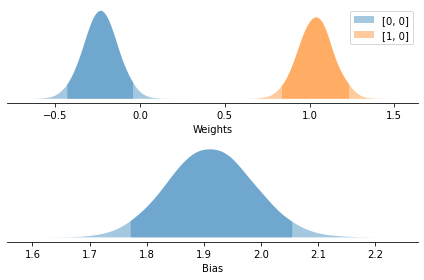

In [154]:
model.posterior_plot(ci=0.95)

## Đối chiếu với mô hình NBI dựng bằng statsmodels

Sử dụng phân phối NB2, statsmodels cho ra kết quả mô hình NBI như sau: 

Ta thấy kết quả khá tương đồng với mô hình dựng bằng probflow: -0.2574 so với -0.23163891

In [112]:
mod = SM_NBI(Y,X, loglike_method='nb2')

print(mod.fit().summary())

Optimization terminated successfully.
         Current function value: 2.766335
         Iterations: 8
         Function evaluations: 9
         Gradient evaluations: 9
                     NegativeBinomial Regression Results                      
Dep. Variable:                      y   No. Observations:                  236
Model:               NegativeBinomial   Df Residuals:                      233
Method:                           MLE   Df Model:                            2
Date:                Wed, 20 Jan 2021   Pseudo R-squ.:                  0.1264
Time:                        14:45:59   Log-Likelihood:                -652.85
converged:                       True   LL-Null:                       -747.31
Covariance Type:            nonrobust   LLR p-value:                 9.510e-42
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.8950      0.072     26.1

Ta có thể kiểm chứng tính phù hợp dữ liệu bằng cách lấy mẫu 5 lượt giá dự báo kết quả từ mô hình, và dùng KDE_plot để chồng lên giá trị quan sát thực tế: kết quả hoàn toàn trùng khớp, cho thấy phân phối NBI là phù hợp, vì mô hình cho phép ước lượng khá chính xác phân phối kết quả trong quần thể.

Text(0.5, 0, 'Số cơn động kinh')

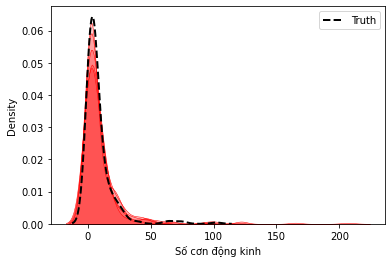

In [212]:
pred_samp = model.predictive_sample(X[:,1:], n=5)

for i in range(5):
    sns.kdeplot(pred_samp[i,:,:].flatten(), 
                shade = True,
                color = 'red',
                alpha=.2, 
                linewidth=0.5,)
    
sns.kdeplot(Y.flatten(), 
            shade = False, 
            color = 'black',
            linestyle = '--',
            alpha = 0.3, 
            linewidth=2,
            label = 'Truth')
plt.legend()
plt.xlabel('Số cơn động kinh')

## Suy diễn thống kê qua Incidence rate ratio

Khi hoán chuyển array bằng hàm exponential rồi trừ đi 1, ta có thể ước lượng hiệu ứng điều trị của thuốc đã làm giảm tần suất cơn động kinh bao nhiêu %

Nhi viết hàm estimate_IRR, cho phép lấy mẫu 5 chuỗi MCMC cho IRR, mỗi chuỗi dài 1000 đơn vị, sau đó chuyển thành arviz data để có thể dùng arviz khảo sát phân phối hậu nghiệm của IRR:

## Chuỗi MCMC của IRR change

In [137]:
def estimate_IRR(pf_mod = model,
                 n_chain = 5000,
                 features = ['Treatment','Log_baseline'],
                 intercept = False):
    mcmc = model.posterior_sample(n=5000)
    
    post_dict = defaultdict()
    
    for i in enumerate(features):
        post_dict[i[1]] = tf.exp(mcmc['Weights'][:,i[0]]).numpy().reshape(n_chain//1000,1000) - 1.
    if intercept:
        post_dict['Intercept'] = tf.exp(mcmc['Bias']).numpy().reshape(n_chain//1000,1000)

    return az.from_dict(post_dict)

In [138]:
trace = estimate_IRR()

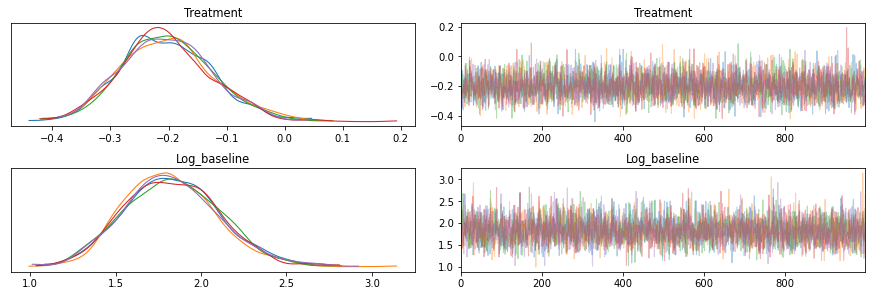

In [139]:
az.plot_trace(trace, compact = False)
plt.show()

## Phân phối hậu nghiệm của IRR change

Giá trị IRR change = -0.2, khoảng mật độ cao nhất 95% từ -0.34 đến -0.038; không bao gồm giá trị 0, do đó có thể nói hiệu ứng điều trị trung bình làm giảm 20% tần suất cơn động kinh so với nhóm không điều trị.

array([<AxesSubplot:title={'center':'Treatment'}>,
       <AxesSubplot:title={'center':'Log_baseline'}>], dtype=object)

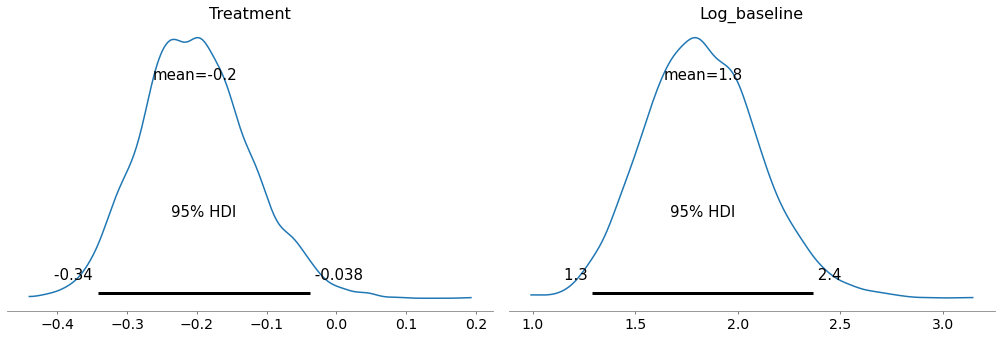

In [210]:
az.plot_posterior(trace,hdi_prob = 0.95 )

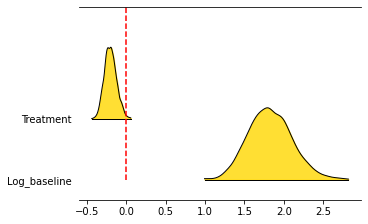

In [211]:
az.plot_forest(trace,
               kind='ridgeplot',
               colors= 'gold',
               ridgeplot_alpha = 0.8,
               linewidth=1,
               combined=True,
               hdi_prob = 0.999,
               ridgeplot_overlap= 1.2,
               figsize=(5,3))

plt.vlines(x=0, ymin = 0, ymax = 6, color = 'red', linestyles='dashed')
plt.show()

In [152]:
az.summary(trace, 
           hdi_prob=0.95, 
           kind = 'stats',
          stat_funcs={'Median': np.median})

,mean,sd,hdi_2.5%,hdi_97.5%,Median
Treatment,-0.202,0.078,-0.342,-0.038,-0.206
Log_baseline,1.831,0.279,1.291,2.368,1.817


Bài thực hành đến đây là hết. Các bạn đã biết cách dùng probflow để fit mô hình Negative Binomial rồi đó.